# Olympische Athleten-Datenanalyse

Aufgabe besteht darin, Daten von den Olympischen Spielen zu analysieren, um spannende Muster oder Trends zu identifizieren, die sich als Nachrichtengeschichte oder als wertvolle Information für Trainer eignen. Dies könnte beispielsweise die Analyse der Leistungstrends bestimmter Länder, die Identifizierung von Erfolgsfaktoren in bestimmten Sportarten oder die Untersuchung gesundheitlicher Aspekte der teilnehmenden Athleten sein.



**Zielgruppe**

SportsStats arbeitet mit lokalen Nachrichtenagenturen und Elite-Personal-Trainern zusammen, um relevante und spannende Einblicke in Sportereignisse zu liefern. Ziel ist es, entweder interessante Nachrichtengeschichten zu generieren oder gesundheitliche Erkenntnisse abzuleiten, die das Training und die Leistung von Athleten verbessern können.

# Projektplan: Fragestellungen und Zielsetzung

#### Frage 1: 
Welche Länder haben in den letzten Jahrzehnten in welchen Sportarten dominiert?

Zielsetzung: 
Analyse der Medaillenverteilung, um die Dominanz einzelner Länder in spezifischen Disziplinen zu erkennen.

#### Frage 2: 
Gibt es Korrelationen zwischen Körpergröße/Gewicht und Erfolg in bestimmten Sportarten?

Zielsetzung: 
Untersuchung, ob physische Attribute in bestimmten Disziplinen eine Rolle spielen (z. B. Leichtathletik vs. Gewichtheben).

#### Frage 3: 
In welchen Altersgruppen sind Athleten in unterschiedlichen Disziplinen am erfolgreichsten?

Zielsetzung: 
Analyse der Altersverteilung bei Medaillengewinnern, um Alterstrends in verschiedenen Sportarten aufzuzeigen.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

participants = pd.read_csv('athletes_events.csv', sep = ';')
participants.describe(include = 'all')

,ID_athlet,ID_event,Year,Medal,Age,NOC
count,219072.000000,219072.000000,219072.000000,33610,210804.000000,219072
unique,NaN,NaN,NaN,3,NaN,228
top,NaN,NaN,NaN,Gold,NaN,USA
freq,NaN,NaN,NaN,11298,NaN,14734
mean,67969.755482,1383.512576,1977.142711,NaN,25.545175,NaN
std,39141.528593,4937.115953,30.297795,NaN,6.423391,NaN
min,1.000000,0.000000,1896.000000,NaN,10.000000,NaN
25%,33967.750000,61.000000,1960.000000,NaN,21.000000,NaN
50%,68267.500000,260.000000,1984.000000,NaN,24.000000,NaN
75%,101851.250000,865.000000,2000.000000,NaN,28.000000,NaN


Nach der Funktion „describe“ sehen wir, dass die Olympischen Spiele von 1896 bis 2016 stattfanden und die Gesamtzahl der Länder 228 beträgt. Bei Google habe ich herausgefunden, dass 207 Länder an den Olympischen Spielen 2016 teilgenommen haben.

Es ist davon auszugehen, dass in den Anfangsjahren nur wenige Länder an den Olympischen Spielen teilnahmen.
Um eine objektive Analyse durchführen zu können, können wir nicht alle Daten analysieren. Wir müssen den Zeitpunkt wählen, ab dem modernere Länder begannen, an den Olympischen Spielen teilzunehmen.
Die Funktion „describe“ zeigt, dass der Median 1984 beträgt.

- Ermitteln wir zunächst die Anzahl der Länder , die jedes Jahr teilnehmen.
- Erstellen wir eine Grafik, um die Trends der teilnehmenden Länder zu sehen.
- Bilden wir den Median sowie die maximalen und minimalen Länder in unserem Diagramm ab.

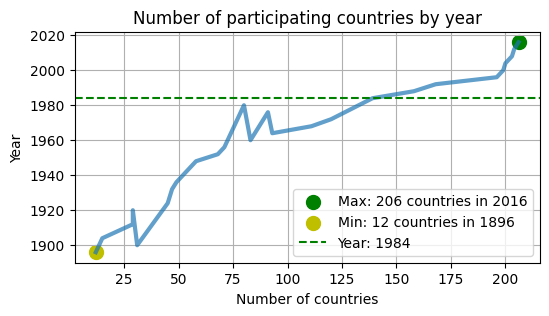

In [3]:

#Group the data by the number of participating countries each year
years_countries = participants.groupby('Year')['NOC'].nunique().sort_values(ascending = True)

years_countries = years_countries.rename('Countries_count')

years_countries = years_countries.reset_index()

#Find the maximum and minimum points on the graph
max_value = years_countries['Countries_count'].max()
max_year = years_countries.loc[years_countries['Countries_count'].idxmax(), 'Year']

min_value = years_countries['Countries_count'].min()
min_year = years_countries.loc[years_countries['Countries_count'].idxmin(), 'Year']

# median
median = 1984

#Plot a graph of the number of countries for each year
plt.figure(figsize=(6,3))
plt.title('Number of participating countries by year')
plt.xlabel("Number of countries")
plt.ylabel('Year')
plt.grid()
plt.plot(
    years_countries['Countries_count'],
    years_countries['Year'],
    alpha = 0.7,
    linewidth=3
) 

#Add these points to the graph
plt.scatter(max_value, max_year, color='g', s=100, 
            label=f'Max: {max_value} countries in {max_year}')
plt.scatter(min_value, min_year, color='y', s=100, 
            label=f'Min: {min_value} countries in {min_year}')
plt.axhline(median, color = 'g', linestyle = '--',
            label=f'Year: {median}')
plt.legend()
plt.show()

- In den Anfangsjahren (z. B. 1896) beteiligten sich nur 12 Länder, im Jahr 2016 sind es 206. Dementsprechend können historische Daten für die Analyse aktueller Trends nicht völlig objektiv sein. Einige Länder haben an allen oder fast allen Olympischen Spielen teilgenommen, während andere Länder erst in den letzten Jahrzehnten entstanden sind. Dies führt zu einer Verzerrung der Analyse, wenn Daten für den gesamten Zeitraum berücksichtigt werden.
- Sportdisziplinen haben sich im Laufe von mehr als 100 Jahren erheblich verändert. Viele Sportarten wurden hinzugefügt oder entfernt, was faire Vergleiche erschwert.
- In der Grafik „Number of participating countries by year“ sehen wir, dass es seit 1984 etwa 150 teilnehmende Länder gab

Um die richtigen Schlussfolgerungen zu ziehen, lohnt es sich auch, im Streudiagramm zu schauen, zu welcher Zeit sich die größte Anzahl an Teilnehmern aus verschiedenen Ländern konzentriert

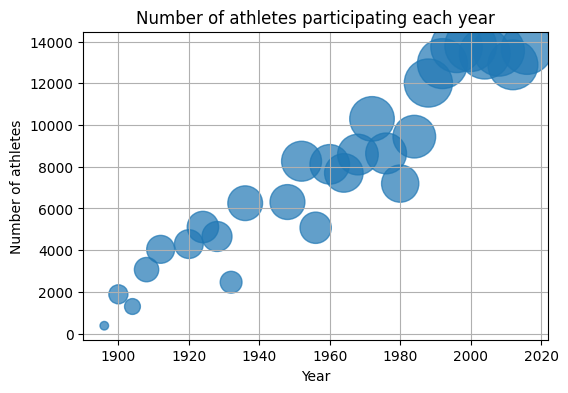

In [4]:
#Group the data by the number of participants for each year
years_athletes = participants.groupby('Year')['ID_athlet'].count().sort_values(ascending = True)

years_athletes = years_athletes.rename('Counts of athletes')

years_athletes = years_athletes.reset_index()

#Plot a graph of the dependence of the number of athletes participating in each year
plt.figure(figsize=(6,4))
plt.title('Number of athletes participating each year')
plt.ylabel('Number of athletes')
plt.xlabel('Year')
plt.grid()
plt.scatter(
    years_athletes['Year'], 
    years_athletes['Counts of athletes'], 
    s=years_athletes['Counts of athletes']/10,
    alpha=0.7)
plt.show()

- Auf dem Streudiagramm 'Number of athletes participating each year' sehen wir auch das obere rechte Quadrat, in dem sich die Hauptzahl der Olympiateilnehmer konzentriert. 
- Wir können die Zeit seit 1984 als einen geeigneteren Zeitpunkt für die Analyse moderner Sportarten hervorheben, an denen die Mehrheit der Athleten aus den Ländern der modernen Olympischen Spiele teilnahm

In [5]:
#Select data after 1984 years
participants_clear = participants.loc[participants['Year'] >= 1984]


### Frage 1:
#### Finden wir die Länder und Sportarten heraus, in denen sie am häufigsten gewinnen


In [6]:
# Filter only winning value
winners = participants_clear.loc[participants_clear['Medal'].notna()]

# Load events the data into the dataframe
sports   = pd.read_csv('events.csv', sep = ';')

# Merge Wiener and sports dataframes so that they can be grouped by sports
winners = pd.merge(winners , sports, how = 'left')

To make the indicators more clear I will take only the leading countries that win most often and have won more than 100 medals

In [7]:
# Group the data and count the number of medals by country and sport
result = winners.groupby(['NOC', 'Sport'])['Medal'].count().sort_values(ascending=False)
result = result.rename('Medals_Numbers')
result = result.reset_index()

# Choose those countries that have more than 100 medals
pioneers = result.loc[result['Medals_Numbers'] >= 100]

# Group by country and count the number of unique sports
country = pioneers.groupby(['NOC'])['Sport'].nunique().sort_values(ascending = False)

# Select rows from result only for countries present in country
filtered_result = result[result['NOC'].isin(country.index)]

# Let's look at the top ten countries
result.head(10)

,NOC,Sport,Medals_Numbers
0,USA,Swimming,562
1,USA,Athletics,369
2,AUS,Swimming,252
3,USA,Basketball,215
4,NED,Hockey,209
5,ROU,Rowing,155
6,AUS,Hockey,145
7,USA,Rowing,144
8,JAM,Athletics,139
9,BRA,Football,136


Erstellen Sie ein Heat-Chart, um die Beziehung zwischen Ländern und Sportarten zu sehen und herauszufinden, welche Länder in welchen Sportarten die meisten Medaillen gewinnen. Dies wird uns helfen herauszufinden, welche Länder in der heutigen Zeit in welchen Sportarten führend sind

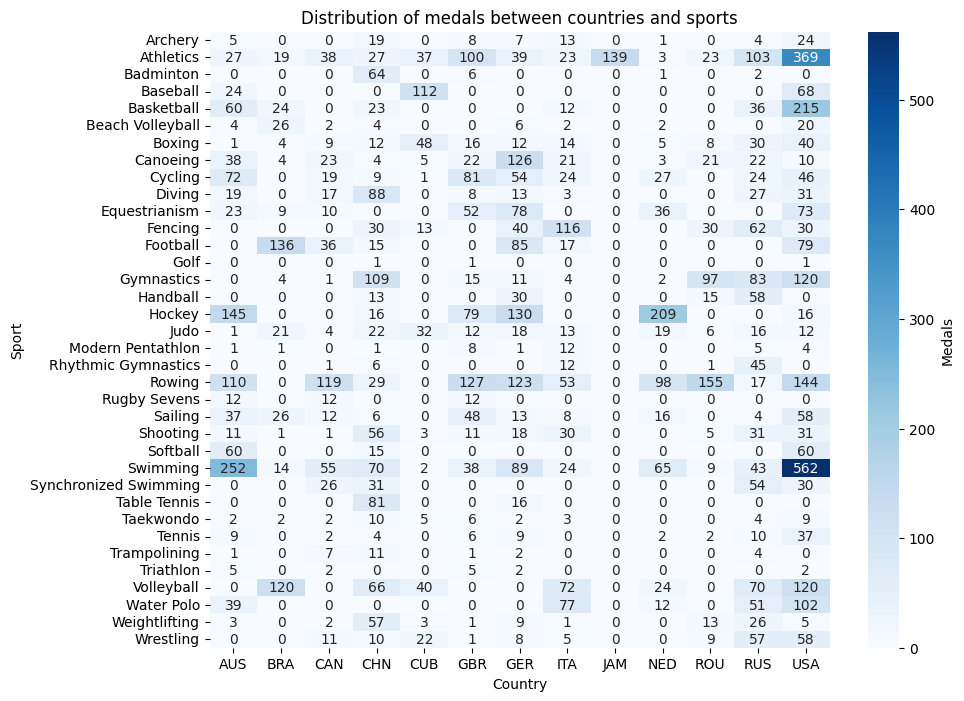

In [8]:
# To create a heat chart first need to make a pivot table
pivot_data = filtered_result.pivot(index='Sport', columns='NOC', values='Medals_Numbers').fillna(0)

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Medals'})
plt.title('Distribution of medals between countries and sports')
plt.xlabel('Сountry')
plt.ylabel('Sport')
plt.show()

Das Heat-Chart zeigte uns, dass **Amerika** im *Schwimmen*, in der *Leichtathletik* und im *Basketball* absoluter Spitzenreiter ist und auch im *Volleyball*, *Rudern*, *Turnen* und *Wasserball* hervorragende Ergebnisse erzielt. Die nächsten bedeutenden Ergebnisse im *Schwimmen*, *Hockey* und *Rudern* belegt **Australien**. Auch beim *Schwimmen*, *Rudern*, *Radfahren*, *Hockey* und *Kanufahren* weist **Deutschland** hervorragende Ergebnisse auf. Auch **China** und **Russland** schafften es unter die ersten fünf. Die **Niederlande** zeigten im *Eishockey* ein sehr gutes Ergebnis.

Ermitteln die 10 Länder, die gemessen an der Gesamtzahl der Medaillen am häufigsten gewinnen

In [9]:
# Group the data by country (NOC) and count the number of medals
win_country = winners.groupby(['NOC'])['Medal'].count().sort_values(ascending=False)

win_country = win_country.rename('Medals_Numbers')

# Convert Series to DataFrame and keep only 10 records
win_country = win_country.reset_index().head(10)
win_country.head(10)

,NOC,Medals_Numbers
0,USA,2376
1,AUS,961
2,GER,941
3,CHN,909
4,RUS,888
5,GBR,664
6,FRA,578
7,ITA,559
8,NED,525
9,KOR,523


Finden auch die zehn führenden Sportarten in der Gesamtwertung

In [10]:
lead_sports = winners.groupby(['Sport'])['Medal'].count().sort_values(ascending=False)
lead_sports = lead_sports.rename('Medals_Numbers')
lead_sports = lead_sports.reset_index()
lead_sports.head(10)

,Sport,Medals_Numbers
0,Athletics,1641
1,Swimming,1624
2,Rowing,1348
3,Hockey,867
4,Handball,787
5,Football,764
6,Canoeing,721
7,Gymnastics,655
8,Basketball,644
9,Volleyball,627


# Fazit Frage 1:
In den letzten Jahrzehnten haben mehrere Länder in unterschiedlichen Sportarten dominiert. 
Die **USA** sind eindeutig führend, mit herausragenden Leistungen in *Schwimmen* (562 Medaillen) und *Athletik* (369 Medaillen), aber auch in *Basketball* (215 Medaillen), *Gymnastik* (120 Medaillen) und *Volleyball* (120 Medaillen). 
**Australien** hat sich besonders im *Schwimmen* (252 Medaillen) *Hockey* (145 Medaillen) und *Rudern* (110 Medallen) einen Namen gemacht
**Deutschland** liegt bei der Gesamtzahl der Medaillen auf dem dritten Platz und schneidet in fast allen Sportarten gut ab, besonders im *Eishockey* (130 Medaillen), *Kanu* (126 Medaillen) und *Rudern* (123 Medaillen) *Schwimmen* (89 Medaillen)  und *Fußball* (85 Medaillen)
**China* belegt mit 91 Medaillen den vierten Platz in der Gesamtwertung. Besonders gut sind die Chinesen im *Turnen* (109 Medaillen), *Diving* (88 Medaillen), *Tischtennis* (81 Medaillen), *Schwimmen* (70 Medaillen), *Badminton* (64 Medaillen)
**Russland** gewinnt in Sportarten wie *Athletik* (103 Medaillen), *Turnen* (83 Medaillen),  *Volleyball* (70 Medaillen)

Zu den Top Ten in Bezug auf die Gesamtzahl der Medaillen gehörten auch **Großbritannien** mit Ergebnissen im *Rudern* (127 Medaillen) und *Leichtathletik* (100 Medaillen), **Frankreich**, **Italien** mit hervorragenden Ergebnissen im *Fechten* (116 Medaillen), **die Niederlande** zeichneten sich ebenfalls mit hervorragenden Ergebnissen im *Eishockey* (209 Medaillen) und **Correia**.

Ein weiteres bemerkenswertes Land ist **Jamaika**, das in der *Leichtathletik* (139 Medaillen) dominiert hat. **Brasilien** hat in den letzten Jahrzehnten im *Fußball* (136 Medaillen) und *Volleyball* (120 Medaillen) beeindruckende Erfolge erzielt. 
Zusätzlich haben auch **Rumänien** im *Rudern* (155 Medaillen) und im *Turnen* (97 Medaillen), und **Kuba** im *Baseball* (112 Medaillen) bemerkenswerte Leistungen gezeigt.

Diese Daten verdeutlichen, dass einige Länder in spezifischen Disziplinen über die Jahre hinweg besonders erfolgreich waren, was durch ihre konstanten Leistungen und Medaillengewinne in diesen Sportarten unterstrichen wird.


# Frage 2:

#### In der zweiten Aufgabe werden wir herausfinden: Gibt es einen Zusammenhang zwischen Sportwettkämpfen/Gewicht und Erfolg bei den besten Sportspielen?

In [14]:
# Download datas to Dataframes
athlets = pd.read_csv('athletes.csv', sep = ';')
events = pd.read_csv('events.csv', sep = ';')

# Let's take the pre-created dataframe "participants_clear" from the previous task.
athlet_event = participants_clear 

# Putting the data together
athlet_medal = pd.merge(athlet_event, athlets, how = 'left', on = 'ID_athlet')
athlet_event_medal = pd.merge(athlet_medal, events, how = 'left', on = 'ID_event')

Um den Zusammenhang zwischen Sportarten und Körpergewicht und -größe zu analysieren und das „ideale“ Gewicht und die „ideale“ Größe für verschiedene Sportarten zu bestimmen, werde ich die Daten analysieren und einige wichtige Punkte hervorheben.
- Zuerst müssen Sie die Daten verarbeiten und Datensätze mit fehlenden Größen- und Gewichtswerten entfernen. Wir werden nur die Zeilen analysieren, die diese Daten enthalten.
- Wir werden nur die Gewinner analysieren
- Für jede Sportart können Sie die durchschnittliche Größe und das durchschnittliche Gewicht der Teilnehmer berechnen, um zu sehen, welche körperlichen Parameter für Vertreter jeder Sportart typisch sind.

In [26]:
# Remove rows with missing height and weight values
athlet_event_medal_clean = athlet_event_medal.dropna(subset=["Height", "Weight"])

# Leave only those who won medals
athlet_event_medal_clean = athlet_event_medal_clean.loc[athlet_event_medal_clean['Medal'].notna()]

# Calculate the average height and weight for each sport by gender
sport_gender_stats = athlet_event_medal_clean.groupby(["Sex","Sport"])[["Height", "Weight"]].mean().round(1)

sport_gender_stats = sport_gender_stats.sort_values(["Sex","Sport"])
sport_gender_stats.head(10)

Height  Weight
Sex Sport                           
F   Archery            167.2    62.2
    Athletics          170.8    61.8
    Badminton          169.9    62.2
    Basketball         183.6    73.7
    Beach Volleyball   180.1    69.0
    Boxing             168.1    61.4
    Canoeing           171.7    65.9
    Cycling            169.2    62.7
    Diving             160.2    50.9
    Equestrianism      169.8    59.8

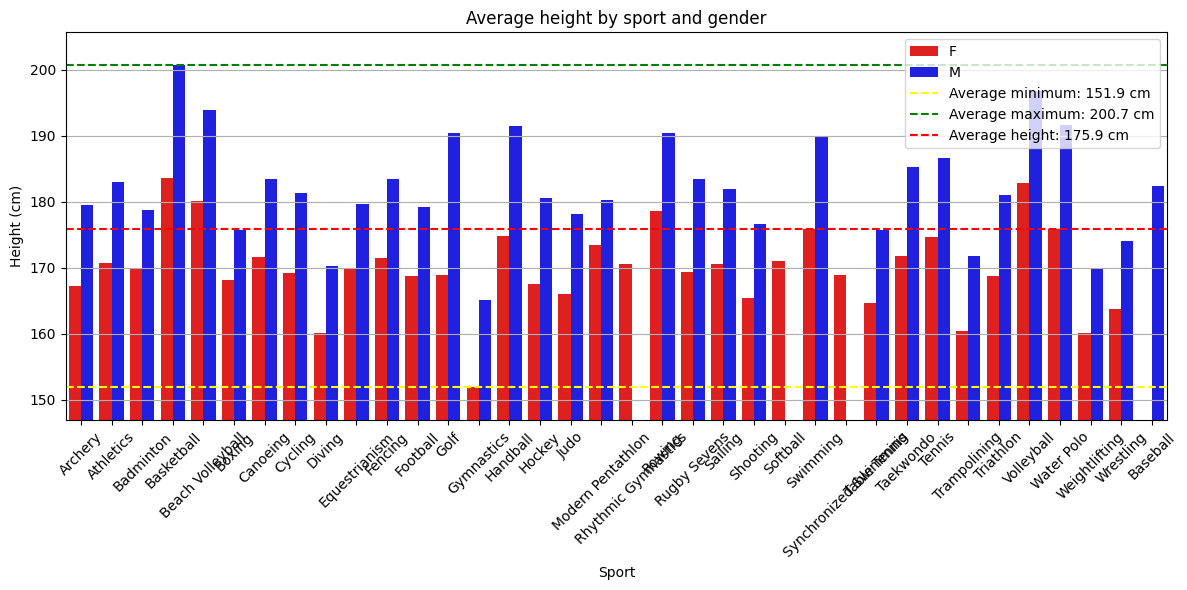

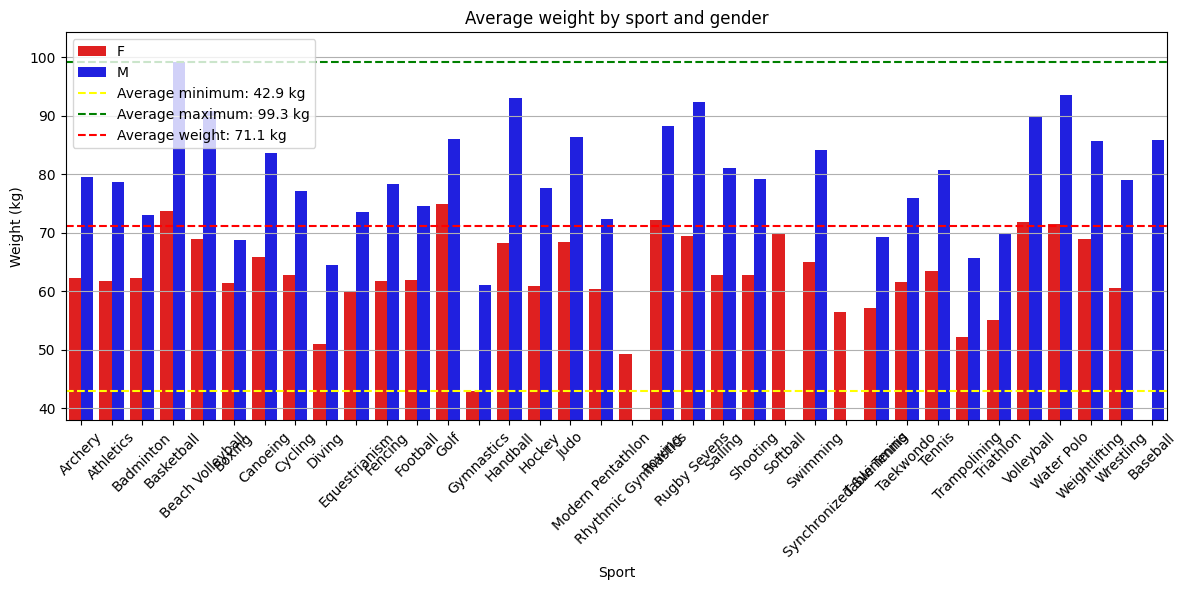

In [22]:
import matplotlib.ticker as ticker

# Minimum and maximum values ​​for growth
min_height = sport_gender_stats["Height"].min()
max_height = sport_gender_stats["Height"].max()
avg_height = sport_gender_stats["Height"].mean().round(1)

# Bar chart for growth
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(
    x="Sport",
    y="Height",
    hue="Sex",
    data=sport_gender_stats,
    ax=ax1,
    palette={"F": "red", "M": "blue"}  # Set colors for women and men
)
ax1.set_title('Average height by sport and gender')
ax1.tick_params(axis='x', rotation=45)  # Rotate labels
ax1.set_ylabel('Height (cm)')

# Set the limits of the Y axis to include min and max
ax1.set_ylim(bottom=min_height - 5, top=max_height + 5)  # Add padding for better visibility

# Set major ticks on Y axis with a step of 10
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Add lines for minimum and maximum values
ax1.axhline(min_height, color="yellow", linestyle="--", label=f"Average minimum: {min_height} cm")
ax1.axhline(max_height, color="green", linestyle="--", label=f"Average maximum: {max_height} cm")
ax1.axhline(avg_height, color="red", linestyle="--", label=f"Average height: {avg_height} cm")
ax1.legend()

# Display the first diagram
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Minimum and maximum values ​​for weight
min_weight = sport_gender_stats["Weight"].min()
max_weight = sport_gender_stats["Weight"].max()
avg_weight = sport_gender_stats["Weight"].mean().round(1)

# Bar chart for weight
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(
    x="Sport",
    y="Weight",
    hue="Sex",
    data=sport_gender_stats,
    ax=ax2,
    palette={"F": "red", "M": "blue"}  # Set colors for women and men
)
ax2.set_title('Average weight by sport and gender')
ax2.tick_params(axis='x', rotation=45)  # Rotate labels
ax2.set_ylabel('Weight (kg)')

# Set the limits of the Y axis to include min and max
ax2.set_ylim(bottom=min_weight - 5, top=max_weight + 5)  # Add padding for better visibility

# Set major ticks on Y axis with a step of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Add lines for minimum and maximum values
ax2.axhline(min_weight,  color="yellow", linestyle="--", label=f"Average minimum: {min_weight} kg")
ax2.axhline(max_weight,  color="green", linestyle="--", label=f"Average maximum: {max_weight} kg")
ax2.axhline(avg_weight, color="red", linestyle="--", label=f"Average weight: {avg_weight} kg")
ax2.legend()

# Display the second diagram
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Fazit Frage 2

Die Analyse der Daten zu Größe und Gewicht von Sportlern nach Sportart und Geschlecht zeigt interessante Trends und Muster:

#### Allgemeine Trends
Männer sind in allen Sportarten im Durchschnitt größer und schwerer als Frauen. Allerdings sind die Unterschiede in Sportarten wie **Rudern**, **Volleyball** und **Wasserball** geringer, da beide Geschlechter hier ähnliche physische Anforderungen erfüllen müssen.

#### Höchstwerte bei Größe und Gewicht
- **Männer:**
  - **Größe:** Basketballspieler (200.7 cm) und Volleyballspieler (196.8 cm) sind die größten Athleten.
  - **Gewicht:** Rugby (92.4 kg), Basketball	(99.3	kg) und Wasserballspieler (93.6 kg) sind die schwersten.
- **Frauen:**
  - **Größe:** Auch bei Frauen sind Basketball (183.6 cm) und Volleyball (182.9 cm) die Sportarten mit den größten Athletinnen.
  - **Gewicht:** Golf (75.0 kg), Basketballspieler (73.7 kg), Rudern (72.1 kg) und Wasserball (71,5 kg) führen bei Frauen hinsichtlich des Gewichts.

#### Mindestwerte bei Größe und Gewicht
- **Männer:**
  - **Größe:** Gewichtheben (160,1 cm), Gymnastik (165,1 cm) und Trampolinspringen (160,4 cm) sind die Sportarten mit den kleinsten männlichen Athleten. 
  - **Gewicht:** Trampolinspringen (52,2 kg), Ringen (60,5 kg) und Gymnastik (61,0 kg) haben die leichtesten männlichen Athleten.
- **Frauen:**
  - **Größe:** Gymnastik (151,9 cm) und Tauchen (160,2 cm) erfordern weniger Körpergröße.
  - **Gewicht:** Gymnastik (42,9 kg) und Rhythmische Sportgymnastik (49.3 kg) verzeichnen die niedrigsten Werte.

#### Schlussfolgerungen
- **Mannschaftssportarten** wie Basketball, Rugby, Volleyball und Wasserballspieler, erfordern eine hohe Körpergröße und ein entsprechend höheres Gewicht.
- **Ästhetische und technische Disziplinen** wie Gymnastik, Trampolinspringen und Tauchen setzen hingegen auf kleinere, leichtere Athleten, die mehr Beweglichkeit und Eleganz zeigen.
- In einigen Disziplinen wie Rudern und Volleyball nähern sich die physischen Parameter von Männern und Frauen an, obwohl Männer insgesamt 10 bis 20 cm größer und schwerer sind als Frauen.

Diese Ergebnisse verdeutlichen, wie stark die körperlichen Anforderungen von der jeweiligen Sportart abhängen und wie diese Anforderungen Geschlecht und Leistung beeinflussen.

# Frage 3:
### In welchen Altersgruppen sind Athleten in unterschiedlichen Disziplinen am erfolgreichsten?

Für eine ordnungsgemäße Analyse verwenden wir ausschließlich Daten von Sportlern, die Medaillen gewonnen haben. Wählen wir nur die Daten aus, in denen Werte in Zelle 'Age' vorhanden sind

In [28]:
# Remove rows with missing Age values
winners_clear =  winners.dropna(subset=["Age"]).copy()


Zur visuellen Analyse unterteilen wir alle Sportler in Altersgruppen, wie zum Beispiel: 

*„14-18“, „19-23“, „24-28“, „29-33“, „34+“.* 

Dadurch können wir besser nachvollziehen, welche Altersgruppe welche Sportart dominiert.

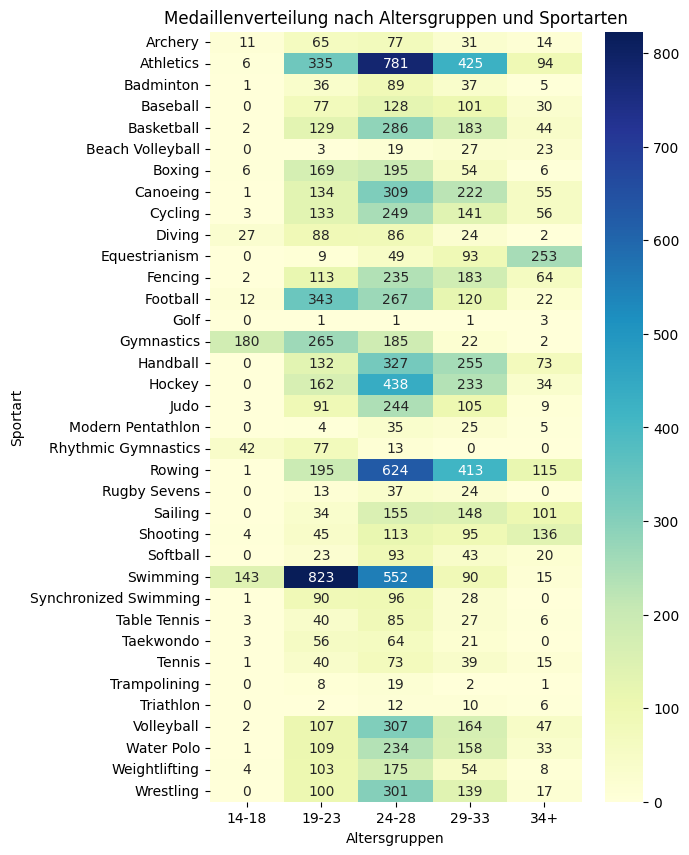

In [29]:
# Altersgruppen definieren
bins = [14, 18, 23, 28, 33, 100]  # Altersgruppen
labels = ['14-18', '19-23', '24-28', '29-33', '34+']  # Altersgruppenbezeichner
winners_clear['Age Group'] = pd.cut(winners_clear['Age'], bins=bins, labels=labels, right=False)

age_sport_medals = winners_clear.groupby(['Sport', 'Age Group'], observed=False)['Medal'].count().unstack().fillna(0)

# Visualisierung als Heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(age_sport_medals, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Medaillenverteilung nach Altersgruppen und Sportarten')
plt.ylabel('Sportart')
plt.xlabel('Altersgruppen')
plt.show()


# Fazid Frage 3:
Aus den dargestellten Daten über die Medaillenverteilung in verschiedenen Sportarten und Altersgruppen lassen sich mehrere interessante Schlussfolgerungen ziehen:

1. **Jüngere Athleten** (14-23 Jahre) sind in den folgenden Sportarten am erfolgreichsten:

- **Gymnastik** und **Schwimmen** (besonders im Alter von 14-18 Jahren).
- **Leichtathletik** und **Basketball** zeichnen sich durch Erfolg in den Altersgruppen 19-23 und 24-28 Jahren aus.

2. **Ältere Athleten** (34+) gewinnen häufig Medaillen in Sportarten, die Erfahrung erfordern:

- **Reiten** (253 Medaillen in der Altersgruppe 34+).
- **Schießen** (136 Medaillen in der Altersgruppe 34+).
3. **Breite Medaillenverteilung** in verschiedenen Altersgruppen:

- **Leichtathletik** und **Fußball** haben Medaillen in mehreren Altersgruppen, vor allem in den Altersgruppen 19-28 Jahren.

4. **Weniger Medaillen** in einigen Sportarten:

**Golf**, **Rugby** und **Trampolining** haben insgesamt weniger Medaillen.
Zusammenfassend lässt sich sagen, dass **jüngere Athleten** in **körperlich anspruchsvollen Sportarten** dominieren, während **ältere Athleten** in Sportarten, die **Erfahrung und Technik** erfordern, erfolgreicher sind.